In [19]:
from preamble import *
%matplotlib inline

## 소개

### 왜 머신 러닝인가?
#### 머신 러닝으로 풀 수 있는 문제
#### 문제와 데이터를 이해하기

### 왜 파이썬인가?

### scikit-learn
#### Scikit-learn 설치

### 필수 라이브러리와 도구들
#### 주피터 노트북
#### NumPy

In [20]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


#### SciPy

In [21]:
from scipy import sparse

# 대각선 원소는 1이고 나머지는 0인 2차원 NumPy 배열을 만듭니다.
eye = np.eye(4)
print("NumPy 배열:\n{}".format(eye))

NumPy 배열:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [22]:
# NumPy 배열을 CSR 포맷의 SciPy 희박 행렬로 변환합니다.
# 0이 아닌 원소만 저장됩니다.
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy의 CSR 행렬:\n{}".format(sparse_matrix))


SciPy의 CSR 행렬:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [23]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO 표현:\n{}".format(eye_coo))

COO 표현:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

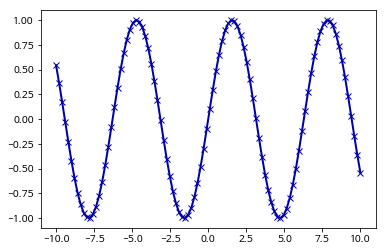

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# -10에서 10까지 100개의 간격으로 나뉘어진 배열을 생성합니다.
x = np.linspace(-10, 10, 100)
# 사인 함수를 사용하여 y 배열을 생성합니다.
y = np.sin(x)
# plot 함수는 한 배열의 값을 다른 배열에 대응해서 선 그래프를 그립니다.
plt.plot(x, y, marker="x")

#### pandas

In [25]:
from IPython.display import display
import pandas as pd

# 회원 정보가 들어간 간단한 데이터셋을 생성합니다.
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display는 주피터 노트북에서 Dataframe을 미려하게 출력해줍니다.
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [26]:
# Age 열의 값이 30 이상인 모든 행을 선택합니다.
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


#### mglearn

### 파이썬 2 vs. 파이썬 3

### 이 책에서 사용하는 소프트웨어 버전

In [27]:
import sys
print("Python 버전: {}".format(sys.version))

import pandas as pd
print("pandas 버전: {}".format(pd.__version__))

import matplotlib
print("matplotlib 버전: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy 버전: {}".format(np.__version__))

import scipy as sp
print("SciPy 버전: {}".format(sp.__version__))

import IPython
print("IPython 버전: {}".format(IPython.__version__))

import sklearn
print("scikit-learn 버전: {}".format(sklearn.__version__))

Python 버전: 3.6.5 (default, Apr  1 2018, 05:46:30) 
[GCC 7.3.0]
pandas 버전: 0.23.4
matplotlib 버전: 2.2.2
NumPy 버전: 1.15.0
SciPy 버전: 1.1.0
IPython 버전: 6.5.0
scikit-learn 버전: 0.19.2


### 첫 번째 애플리케이션: 붓꽃의 품종 분류
#### 데이터 적재

##### Added by kang 2018.08.23
load_iris가 반환한 iris객체는 파이썬의 Dictionary와 유사한 Bunch 클래스의 객체 이다. 즉 키와 값으로 구성되어 있다.

In [28]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
print("iris_dataset의 키: {}".format(iris_dataset.keys()))

iris_dataset의 키: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [7]:
print(iris_dataset['DESCR'] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
print("키 속성값 탐색 {}".format(iris_dataset['data']))

키 속성값 탐색 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [22]:
print("타깃의 이름: {}".format(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [14]:
print("특성의 이름: {}".format(iris_dataset['feature_names']))

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
print("data의 타입: {}".format(type(iris_dataset['data'])))

data의 타입: <class 'numpy.ndarray'>


In [16]:
print("data의 크기: {}".format(iris_dataset['data'].shape))

data의 크기: (150, 4)


In [8]:
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print("target의 타입: {}".format(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [19]:
print("target의 크기: {}".format(iris_dataset['target'].shape))

target의 크기: (150,)


In [20]:
print("타깃:\n{}".format(iris_dataset['target']))

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 성과 측정: 훈련 데이터와 테스트 데이터
##### Added by IH 2018.08.30 test_size 옵션을 추가했다. http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size=0.2, random_state=0)

In [30]:
print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))

X_train 크기: (120, 4)
y_train 크기: (120,)


In [31]:
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_test 크기: (30, 4)
y_test 크기: (30,)


#### 가장 먼저 할 일: 데이터 살펴보기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b3ec62cc0>,
      dtype=object)

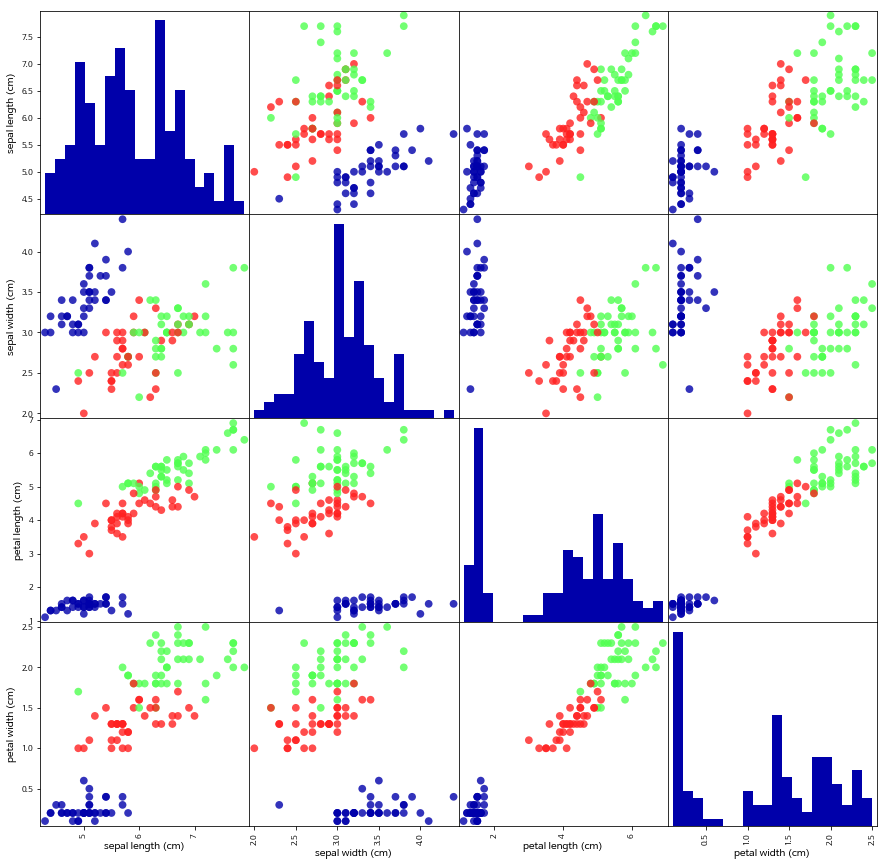

In [37]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='b',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

# Added by IH scatter_matrix
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html 

#### 첫 번째 머신 러닝 모델: k-최근접 이웃 알고리즘

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### 예측하기

In [40]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [41]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
       iris_dataset['target_names'][prediction]))

예측: [0]
예측한 타깃의 이름: ['setosa']


#### 모델 평가하기

In [42]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [43]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 1.00


In [44]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 1.00


### 요약

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97
